Accuracy: 0.88
Precision: 0.88
Recall: 0.88
F1 Score: 0.88
ROC AUC: 0.95


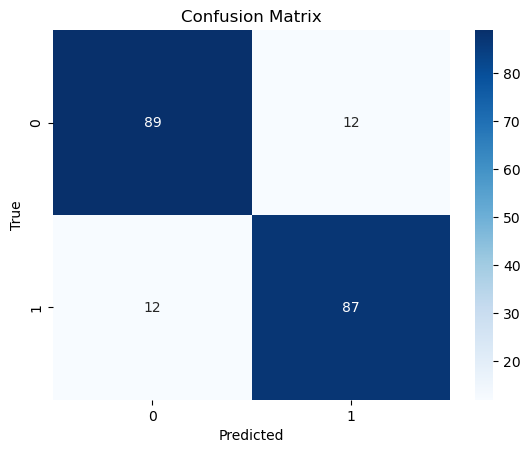

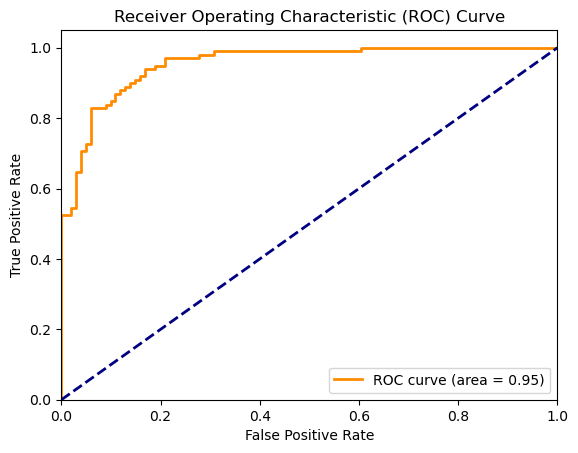

In [3]:
import numpy as np
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns

# Генеруємо набір даних для бінарної класифікації
X, y = make_classification(n_samples=1000, n_features=2, n_informative=2, n_redundant=0, n_classes=2, random_state=42)

# Розділімо дані на навчальний та тестовий набори
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Навчимо класифікатор (логістичну регресію)
clf = LogisticRegression()
clf.fit(X_train, y_train)

# Проведемо прогнози на тестовому наборі
y_pred = clf.predict(X_test)

# Оцінимо ефективність класифікатора
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, clf.predict_proba(X_test)[:, 1])

print(f'Accuracy: {accuracy:.2f}')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1 Score: {f1:.2f}')
print(f'ROC AUC: {roc_auc:.2f}')

# Побудуємо матрицю плутанини
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# Побудуємо ROC-криву
y_prob = clf.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


In [5]:
import numpy as np
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

# Генеруємо набір даних для мультикласової класифікації
X, y = make_classification(n_samples=1000, n_features=4, n_classes=4, n_clusters_per_class=1, n_informative=3, n_redundant=0, n_repeated=0, random_state=42)

# Розділімо дані на навчальний та тестовий набори
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Навчимо кілька класифікаторів
classifiers = {
    'Random Forest': RandomForestClassifier(random_state=42),
    'SVM': make_pipeline(StandardScaler(), SVC(kernel='linear', probability=True, random_state=42)),
    'Logistic Regression': LogisticRegression(multi_class='ovr', random_state=42)
}

results = {}

for name, clf in classifiers.items():
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    conf_matrix = confusion_matrix(y_test, y_pred)
    
    results[name] = {
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1,
        'Confusion Matrix': conf_matrix
    }

# Порівняємо результати класифікаторів
for name, metrics in results.items():
    print(f'{name}:')
    print(f'Accuracy: {metrics["Accuracy"]:.2f}')
    print(f'Precision: {metrics["Precision"]:.2f}')
    print(f'Recall: {metrics["Recall"]:.2f}')
    print(f'F1 Score: {metrics["F1 Score"]:.2f}')
    print(f'Confusion Matrix:')
    print(metrics["Confusion Matrix"])
    print()


Random Forest:
Accuracy: 0.90
Precision: 0.89
Recall: 0.90
F1 Score: 0.89
Confusion Matrix:
[[55  1  2  0]
 [ 1 40  1  7]
 [ 2  2 42  0]
 [ 1  4  0 42]]

SVM:
Accuracy: 0.84
Precision: 0.85
Recall: 0.84
F1 Score: 0.84
Confusion Matrix:
[[54  2  2  0]
 [ 2 34  1 12]
 [ 3  2 41  0]
 [ 2  5  0 40]]

Logistic Regression:
Accuracy: 0.81
Precision: 0.81
Recall: 0.81
F1 Score: 0.81
Confusion Matrix:
[[54  2  2  0]
 [ 4 29  2 14]
 [ 4  2 40  0]
 [ 1  6  0 40]]

